<h1 style="font-size:3rem;color:dodgerblue;">Household Electric Power Consumption Patterns</h1>
<img src="dataset-cover.jpg">

In [18]:
import pandas as pd

# Load the dataset
df = pd.read_csv('household_power_consumption.txt',sep=';')  

# Convert 'Date' and 'Time' into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Set the datetime as the index
df.set_index('Datetime', inplace=True)

# Display the first few rows to confirm
df.head()


/var/folders/f5/3_p9j3vx59qbngxyj3vqmh7c0000gn/T/ipykernel_7411/1072192255.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('household_power_consumption.txt',sep=';')


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Visualize the 'Global_active_power' over time.

In [20]:
print(df.dtypes)

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [21]:
# Convert 'Global_active_power' to numeric, errors='coerce' will set invalid parsing as NaN
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [24]:
# Check for NaN values
print(df.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [23]:
# Fill NaN values with 0
df.fillna(0, inplace=True)

## Plotting Global Active Power

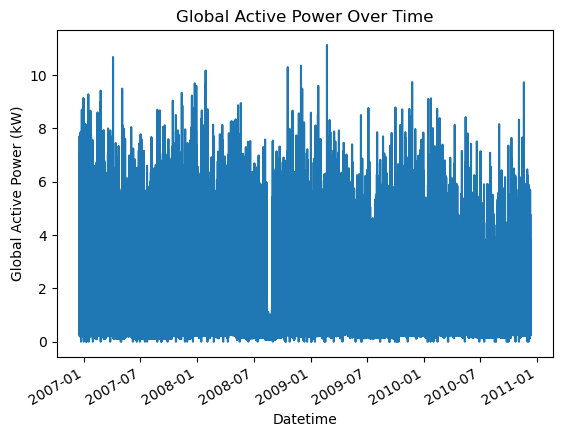

In [25]:
df['Global_active_power'].plot(title='Global Active Power Over Time')
plt.ylabel('Global Active Power (kW)')
plt.show()

## Correlation Analysis

In [26]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation with target variable
print(correlation_matrix['Global_active_power'].sort_values(ascending=False))


Global_active_power      1.000000
Global_intensity         0.998903
Sub_metering_3           0.641816
Sub_metering_1           0.483442
Sub_metering_2           0.434426
Global_reactive_power    0.257542
Voltage                  0.066527
Name: Global_active_power, dtype: float64


## Feature Importance from Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor()

# Define target and features
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']

# Fit the model
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importances
print(feature_importances)


Global_intensity         0.998186
Voltage                  0.000740
Global_reactive_power    0.000550
Sub_metering_1           0.000242
Sub_metering_3           0.000171
Sub_metering_2           0.000112
dtype: float64


## Clustering Analysis

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features (excluding date and time if they haven't been dropped)
X_scaled = scaler.fit_transform(X)


/Users/gp/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gp/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gp/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gp/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gp/anaconda3/lib/python3.

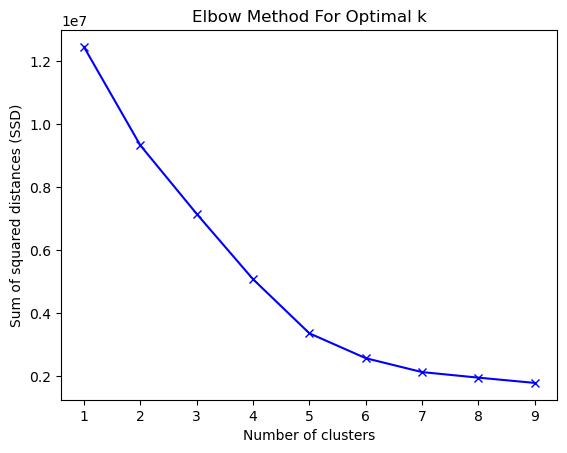

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate sum of squared distances
ssd = []
range_n_clusters = list(range(1, 10))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

# Plot the SSD for each n_clusters
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [30]:
# Assuming the elbow point is found at k=6 
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Assign the clusters to each instance
clusters = kmeans.labels_

# Optionally, add the cluster IDs to the original DataFrame
df['Cluster'] = clusters


/Users/gp/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').mean()
print(cluster_analysis)


         Global_active_power  Global_reactive_power     Voltage  \
Cluster                                                           
0                   0.763220               0.261408  241.143997   
1                   3.928951               0.199928  237.251897   
2                   1.826840               0.116755  239.778591   
3                   0.000000               0.000000    0.000000   
4                   0.443828               0.062576  241.780328   
5                   3.773471               0.192711  237.662706   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Cluster                                                                    
0                3.412607        0.125087        0.911121        1.671611  
1               16.664468       36.762517        1.424549       11.181630  
2                7.615484        0.190173        0.446696       18.067138  
3                0.000000        0.000000        0.000000        0.000000  
4      

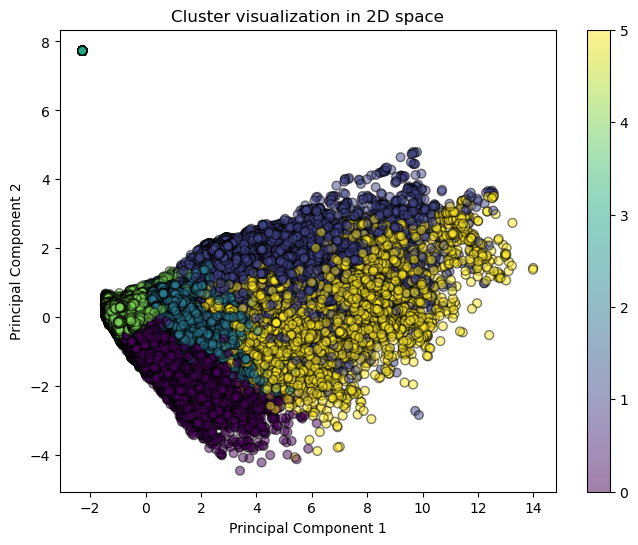

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=40, alpha=0.5)
plt.title('Cluster visualization in 2D space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
